In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/losses/losses.pkl
/kaggle/input/filteredd/companies_usa_size_over_10.csv


In [3]:
# this model will be identical to what authors did in the Bengio et al. A Neural Probabilistic Language Model
  # in the paper authors predicts the words in a sequence but in my case it is characters

In [4]:
import torch
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt

import random
random.seed(10110609)

%matplotlib inline

In [5]:
companies_df = pd.read_csv(
  "/kaggle/input/filteredd/companies_usa_size_over_10.csv", usecols=["name"]
)

companies = companies_df.name.to_list()

In [6]:
alphabet = sorted(set("".join(companies)))
alphabet.insert(0, '.')
len_alphabet = len(alphabet)
print(f"{len_alphabet=}")

strtoint = {j: i for i, j in enumerate(alphabet)}
inttostr = {i: j for i, j in enumerate(alphabet)}

len_alphabet=27


In [7]:
block_size = 3
X, Y = [], []
for company in companies:
  
#   print(company)
  context = [0] * block_size

  for ch in company + '.':
    ix = strtoint[ch]
    
    X.append(context)
    Y.append(ix)
#     print(''.join(inttostr[i] for i in context), '--->', inttostr[ix])
    context = context[1:] + [ix] # crop and append
  
X = torch.tensor(X)
Y = torch.tensor(Y)

In [8]:
block_size = 3
def build_dataset(words):
    X, Y = [], []
    for word in words:

    #   print(company)
      context = [0] * block_size

      for ch in word + '.':
        ix = strtoint[ch]
        X.append(context)
        Y.append(ix)
    #     print(''.join(inttostr[i] for i in context), '--->', inttostr[ix])
        context = context[1:] + [ix] # crop and append

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X, Y

In [9]:
random.shuffle(companies)
n1 = int(0.8*len(companies))
n2 = int(0.9*len(companies))

X_train, Y_train = build_dataset(companies[:n1])
X_dev, Y_dev = build_dataset(companies[n1:n2])
X_test, Y_test = build_dataset(companies[n2:])

In [10]:
companies[:5]

['managedoffice', 'idmatrixindia', 'sightmd', 'popshelf', 'jaroop']

In [11]:
X_train.shape, X_dev.shape, X_test.shape

(torch.Size([668185, 3]), torch.Size([83202, 3]), torch.Size([83281, 3]))

In [26]:
X.shape, Y.shape

(torch.Size([834668, 3]), torch.Size([834668]))

In [12]:
X, Y

(tensor([[ 0,  0,  0],
         [ 0,  0,  5],
         [ 0,  5, 17],
         ...,
         [14, 14,  1],
         [14,  1,  3],
         [ 1,  3, 11]]),
 tensor([ 5, 17, 21,  ...,  3, 11,  0]))

In [13]:
X[0], Y[0]

(tensor([0, 0, 0]), tensor(5))

In [14]:
inttostr[5]

'e'

In [15]:
# This means that 'e' (5) is followed by the '...' ([0, 0, 0]) in the first example

In [16]:
X.dtype, Y.dtype

(torch.int64, torch.int64)

For each character in the alphabet, associate let's say n-dimensional feature vector. Think of this as n-dimensional space where all the characters are embedded in that. During backprob the similar words will basicly end up in closer positions and vice versa.

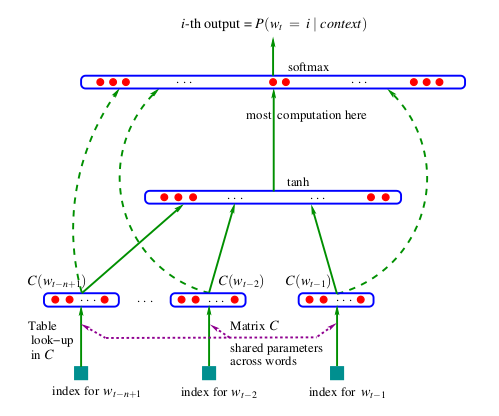

We are taking 3 characters and trying to predict the 4th one in a sequence.

In the first layer there are 30 neurons for each of the 3  characters, making up 90 neurons in total

In [17]:
C = torch.randn((27, 2)) # feature vector
# it is a (27,2) tensor where each row represents embedding for each letter

In [14]:
C.shape

torch.Size([27, 2])

In [15]:
X.shape

torch.Size([10, 3])

In [16]:
C[strtoint['a']]

tensor([-0.2257, -0.8463])

In [29]:
C

tensor([[-2.2889e-01, -8.7629e-01],
        [-2.2573e-01, -8.4625e-01],
        [ 2.1498e-01, -9.3545e-01],
        [-6.4902e-01, -1.4916e+00],
        [ 5.7491e-01,  1.1504e+00],
        [ 8.1873e-01, -2.2462e-01],
        [-2.6829e-01,  1.4400e-02],
        [ 3.1675e-01,  7.6032e-01],
        [ 2.1712e+00, -1.0812e+00],
        [-4.6558e-01,  4.7510e-01],
        [ 9.8775e-01,  4.6374e-01],
        [-2.1446e+00, -2.2851e-01],
        [-2.2564e+00, -6.1443e-01],
        [-5.9679e-01, -1.8119e+00],
        [-2.6649e-01, -8.3672e-01],
        [ 9.3652e-01,  1.8203e+00],
        [ 2.3284e+00,  1.1559e-03],
        [-2.0274e+00, -1.6905e+00],
        [-7.3542e-01,  3.7664e-01],
        [ 8.4567e-01,  1.6725e+00],
        [ 6.5630e-01, -1.8331e+00],
        [-1.6748e+00,  1.2691e+00],
        [-2.0893e-01, -9.9746e-01],
        [ 3.8916e-01, -1.9284e+00],
        [-8.2163e-01,  2.3544e-01],
        [ 5.0218e-01, -6.0305e-01],
        [-2.9064e-01, -1.2105e+00]])

In [30]:
print(X.shape) # each row is example of 3 chars which are followed by one char in Y
print(Y.shape)
print(C.shape) # each row is feature vector for each letter

torch.Size([45, 3])
torch.Size([45])
torch.Size([27, 2])


In [31]:
emb = C[X]
emb.shape

torch.Size([45, 3, 2])

In [32]:
emb[0]

tensor([[-0.2289, -0.8763],
        [-0.2289, -0.8763],
        [-0.2289, -0.8763]])

In [33]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [36]:
(emb.view(-1, 6) @ W1 + b1).shape

torch.Size([45, 100])

In [38]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # -1 is x axis, number of all examples

In [39]:
h.shape

torch.Size([45, 100])

In [40]:
W2 = torch.randn((100, 27)) # 27 is for each of the characters
b2 = torch.randn(27)

In [41]:
logits = h @ W2 + b2

In [43]:
logits.shape

torch.Size([45, 27])

In [44]:
# softmax
counts = logits.exp()
prob = counts / counts.sum(1, keepdims=True)

In [45]:
prob.shape

torch.Size([45, 27])

In [50]:
prob[0] # probability assigned by network to the 4 character for the first example

tensor([4.3979e-15, 1.7958e-15, 3.8895e-09, 9.0165e-13, 1.9712e-08, 2.8669e-08,
        2.3385e-09, 1.4868e-09, 1.8945e-08, 4.5624e-09, 1.8167e-06, 3.4765e-04,
        6.0027e-13, 5.2550e-10, 8.4674e-05, 7.6215e-16, 2.4037e-07, 8.8457e-01,
        7.7767e-07, 5.2772e-12, 1.0469e-05, 1.2821e-15, 1.9610e-06, 2.4813e-09,
        1.1550e-05, 1.5071e-07, 1.1497e-01])

In [53]:
loss = -prob[torch.arange(45), Y].log().mean()
loss.item()

20.6101016998291

# Alltogether

In [36]:
# construct the network

n_emb = 10 # dimension of the feature vector (embedding)
n_hid = 200 # number of neurons in the hidden layer

g = torch.Generator().manual_seed(10110609)               # seed to to get same result
C = torch.randn((27, n_emb), generator=g)                 # feature vector for each char
W1 = torch.randn((n_emb*block_size, n_hid), generator=g)  # hidden layer weights
b1 = torch.randn(n_hid, generator=g)                      # hidden layer biases
W2 = torch.randn((n_hid, 27), generator=g)                # weigths for the output layer (logits)
b2 = torch.randn(27, generator=g)                         # biases for the output layer (logits)
params = [C, W1, b1, W2, b2]

n_params = sum(p.nelement() for p in params)
print(f"Total number of network's parameters: {n_params}")

Total number of network's parameters: 11897


In [16]:
# enable gradient for the parameters
for p in params:
  p.requires_grad = True

In [17]:
# finding optimal learning rate
lrexp = torch.linspace(-3, 0, 1000)
lrc = 10**lrexp
lrs = []
losses = []

In [18]:
# track the iteration and corresponding loss
steps = []
losses = []
losses1 = []

In [33]:
max_iter = 200000
batch_size = 32

for i in range(max_iter):
     
    # minibatch
    batch_idx = torch.randint(0, X_train.shape[0], (batch_size,))
    X_batch = X_train[batch_idx]
    Y_batch = Y_train[batch_idx]

    # forward prop
    emb = C[X_batch] # constructing the feature vector for chars
    emb_concat = emb.view(emb.shape[0], -1) # combine the vectors
    pre_act = emb_concat @ W1 + b1 # hidden layer before tanh activation
    h = torch.tanh(pre_act) # hidden layer
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y_batch) # equivalent to raise exp and normalize the probabilities

    # backward prop
    for p in params:
      p.grad = None
    loss.backward()

    # update the parameters
#     lr = lrc[i]
#     lr = 10 ** -2
#     lr = 0.1 if i < 500000 else 0.01
    LR = 0.01
    for p in params:
      p.data += -lr * p.grad
    
#     lrs.append(lrexp[i])
    losses.append(loss.item())

    # track scores
    steps.append(i)
    losses1.append(loss.log10().item())
    
    # log the status
    if i % 10000 == 0:
      print(f"{i} / loss = {loss.item()}")
    
# print(loss.item())

0 / loss = 2.4214980602264404
10000 / loss = 2.8286032676696777
20000 / loss = 2.498713254928589
30000 / loss = 2.443462371826172
40000 / loss = 2.6595404148101807
50000 / loss = 2.686433792114258
60000 / loss = 2.7291438579559326
70000 / loss = 2.461606502532959
80000 / loss = 2.285444974899292
90000 / loss = 2.8656716346740723
100000 / loss = 2.1062445640563965
110000 / loss = 2.449662685394287
120000 / loss = 3.0959415435791016
130000 / loss = 2.581646680831909
140000 / loss = 2.355957508087158
150000 / loss = 2.5393409729003906
160000 / loss = 2.548018455505371
170000 / loss = 3.0235631465911865
180000 / loss = 2.6980972290039062
190000 / loss = 2.122377872467041


In [26]:
# 500000 iterations for the learning rate 0.1
# 200000 iterations fot the lr decay 0.01
# loss_train=2.342067241668701
# loss_dev=2.3632254600524902

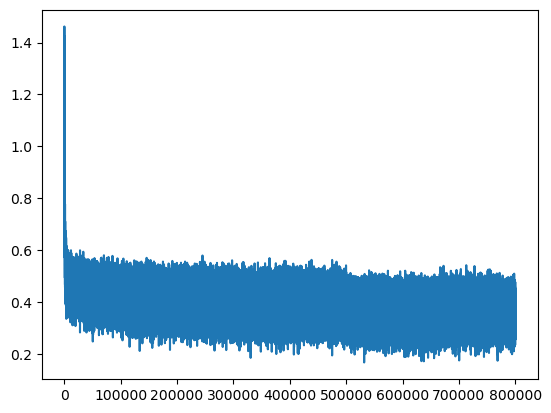

In [55]:
plt.plot(steps, losses1)